In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import plotly.graph_objects as go 
from plotly.subplots import make_subplots


In [2]:
# Online Retail.xlsx

In [3]:
!pip install openpyxl

In [4]:
df = pd.read_excel("Online Retail.xlsx")

In [5]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [6]:
df.isna().sum() / df.shape[0] 

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

In [7]:
df.isna().sum()
df = df.dropna()

In [8]:
df # Its about 14k rows drops
   # maybe later i will see how i can handle them but now its good to my pc to drop them 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [9]:
for col in df.columns:
    print(f"Number of unique values in column {col} is : {df[col].nunique()}")

Number of unique values in column InvoiceNo is : 22190
Number of unique values in column StockCode is : 3684
Number of unique values in column Description is : 3896
Number of unique values in column Quantity is : 436
Number of unique values in column InvoiceDate is : 20460
Number of unique values in column UnitPrice is : 620
Number of unique values in column CustomerID is : 4372
Number of unique values in column Country is : 37


In [10]:
# we have 37 country in this dataset 
# we have 4372 customer 

In [11]:
from tools import drop_Outliers

In [12]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [13]:
numerical_cols = ["UnitPrice" , "Quantity"]

In [14]:
def Muti_box_plot(df , columns):
    
    rows = 1
    cols = 2
    fig = make_subplots(rows=rows, cols=cols , subplot_titles = [col.title() for col in columns])
    
    for i , column in enumerate(columns):
        row = 1
        col = (i)%cols + 1
        
        fig.add_trace(
        go.Box(x = df[column] ,
        # histnorm='percent',
        showlegend=False,
        name=column.title(),

        opacity=0.75
    ),
        row=row, col=col
        
    )
    
    
    
        fig.update_layout(plot_bgcolor = "white",
                 font = dict(color = "#909497", size = 18),
                 title = dict(text = "all numerical columns".title(), font = dict(size = 26)),
                 margin = dict(t = 100, r = 80, b = 80, l = 120),
                 hovermode="closest",
                 height = 1000,
                 width = 900)
        
    fig.show() 


In [15]:
# show outliers 
# Muti_box_plot(df , numerical_cols)

In [16]:
selected_columns = [col for col in df if df[col].dtype in ["int64" , "float64"]]
selected_columns

['Quantity', 'UnitPrice', 'CustomerID']

In [17]:
# df_without_outliers = df.copy()
# for col in numerical_cols:
#     df_without_outliers[col] = drop_Outliers(df_without_outliers , col)

In [18]:
for col in numerical_cols:
    df[col] = drop_Outliers(df , col)

/tmp/ipykernel_5719/1731234422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = drop_Outliers(df , col)
/tmp/ipykernel_5719/1731234422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = drop_Outliers(df , col)


In [19]:
df.isna().sum() / df.shape[0] 

InvoiceNo      0.000000
StockCode      0.000000
Description    0.000000
Quantity       0.065585
InvoiceDate    0.000000
UnitPrice      0.088615
CustomerID     0.000000
Country        0.000000
dtype: float64

In [20]:
df = df.dropna()

In [21]:
df = df.reset_index(drop = True )
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
344388,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09 12:50:00,0.85,12680.0,France
344389,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09 12:50:00,2.10,12680.0,France
344390,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09 12:50:00,4.15,12680.0,France
344391,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
import plotly.graph_objects as go

y = df.Country.value_counts()[:10]
x = df.Country.value_counts().index[:10]
# Create a bar plot
fig = go.Figure(data=go.Bar(x=x, y=y))

# Customize the layout
fig.update_layout(plot_bgcolor = "white",
              font = dict(color = "#909497", size = 18),
              title = dict(text = "Top 10 Country", 
              font = dict(size = 26)),
              margin = dict(t = 100, r = 80, b = 80, l = 120),
              hovermode="closest",
              height = 800,
              width = 800)


# Show the plot
fig.show()

In [ ]:
ok United Kingdom has the higher trade activity 

In [ ]:
import plotly.graph_objects as go

y = df.CustomerID.value_counts().values[:10]
x = df.CustomerID.value_counts().index[:10].astype(str)
# Create a bar plot
fig = go.Figure(data=go.Bar(x=x, y=y))

# Customize the layout
fig.update_layout(plot_bgcolor = "white",
              font = dict(color = "#909497", size = 18),
              title = dict(text = "Top 10 Customer", 
              font = dict(size = 26)),
              margin = dict(t = 100, r = 80, b = 80, l = 120),
              xaxis = dict(tickvals = df.CustomerID.value_counts().index[:10].astype(str)),
              hovermode="closest",
              height = 800,
              width = 800)


# Show the plot
fig.show()

In [ ]:
# Based on the dataset, it is evident that customer ID 17841 has significantly higher trade activity.

In [ ]:
### Feature Engineering 

In [ ]:
df["Total Price"] = df.Quantity * df.UnitPrice 


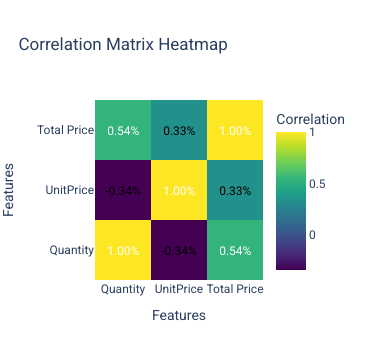

In [36]:
import plotly.graph_objects as go

# Select numerical columns excluding 'CustomerID' and compute the correlation matrix
correlation_matrix = df.select_dtypes(include=["int64", "float64"]).drop(columns="CustomerID").corr()

# Extract column names for labeling
column_names = correlation_matrix.columns

# Create annotations for the heatmap with percentages
annotations = []
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        percentage = correlation_matrix.values[i, j]
        annotations.append(
            go.layout.Annotation(
                text=f'{percentage:.2f}%',
                x=j,
                y=i,
                xref='x1',
                yref='y1',
                showarrow=False,
                font=dict(color='black' if percentage < 0.5 else 'white')
            )
        )



# Create a heatmap figure using Plotly
fig = go.Figure(
    data=go.Heatmap(
        z=correlation_matrix,
        x=column_names,  # Set x-axis labels
        y=column_names,  # Set y-axis labels
        colorscale='Viridis',  # Optional: Choose a color scale for better visualization
        colorbar=dict(title="Correlation")  # Optional: Add a title to the color bar
    )
)

# Set the title and axis labels for better context
fig.update_layout(
    title="Correlation Matrix Heatmap",
    xaxis_title="Features",
    yaxis_title="Features",
    annotations=annotations
    
)

# Display the heatmap
fig.show()

In [ ]:
# as we see if the quantity increasing the unit price get low but the total price get increase 
# and the total price is increase by unit price too 

# and that cause total price = Quantity * unit price 

In [ ]:
df["Year"] = pd.to_datetime(df.InvoiceDate).dt.year
df["Month"] = pd.to_datetime(df.InvoiceDate).dt.month 
df["Day"] = pd.to_datetime(df.InvoiceDate).dt.day 
df["Time"] = pd.to_datetime(df.InvoiceDate).dt.time

In [ ]:
s

In [ ]:
from tools import column_summary_statistics 
from tools import plot_column_summary_statistics 
plot_column_summary_statistics(column_summary_statistics(df , "Year" , "Quantity"))


#### what we get 
* there is a negative values in min Quantity
* that is not natural to have Quantity in negative 

#### Quick search: 
* What is negative quantity in stock?
* A negative quantity indicates a sell transaction whereas a positive quantity indicates a buy transaction.
* The shares you sold will be settled on T+2 day & the funds will be available for withdrawal then.
* However, 80% of the value of shares sold can be utilized to make additional trades.

#### What we will do 
* So right now we will apply absolute on total price column
* we will Create another columns called 
transaction type that indicates whether sell or buy transactions 

In [ ]:
# applay absolute 
df["Total Price"] = df["Total Price"].apply(lambda x : np.abs(x))

In [ ]:
# Create another column called Transaction Type 
df["Transaction Type"] = ["Buy" if i > 0 else "Sell" for i in df.Quantity ]

In [ ]:
# Plot a statistical plot for Transformation Type and Total Price
plot_column_summary_statistics(column_summary_statistics(df , "Transaction Type" , "Total Price"))

* idk why the lowest price of buy is not shown 

In [ ]:
# preprocessing 

In [ ]:
Data = pd.get_dummies(df.drop(["InvoiceNo" , "StockCode" , "Description" ,"InvoiceDate"] , axis = 1) , "Country")

In [ ]:
Data.corr()

In [ ]:
dim 

In [ ]:
from sklearn.decomposition import PCA 

In [ ]:
dim_red = PCA()

In [ ]:
new_data = dim_red.fit_transform(Data)

In [ ]:
new_data.shape

In [ ]:
columns = dim_red.get_feature_names_out()

In [ ]:
dim_red.explained_variance_ratio_.round(3)

In [ ]:
import seaborn as sns 

In [ ]:
sns.pairplot(pd.DataFrame(new_data[: , :2] , columns = columns[:2]))

let try using Kmeans with k = 2 

* for more information : https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [ ]:
kmeanModel = KMeans(2)

In [ ]:
kmeanModel.fit(new_data)

In [ ]:
predict = kmeanModel.predict(new_data)

In [ ]:
sns.scatterplot(x = new_data[:,0] ,y = new_data[:,1] , hue = predict)

In [ ]:
kmeanModel.inertia_

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(new_data)
    kmeanModel.fit(new_data)
 
    distortions.append(sum(np.min(cdist(new_data, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / new_data.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(new_data, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / new_data.shape[0]
    mapping2[k] = kmeanModel.inertia_


In [ ]:
for key, val in mapping1.items():
    print(f'{key} : {val}')


In [ ]:
import matplotlib.pyplot as plt 
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


In [ ]:
for key, val in mapping2.items():
    print(f'{key} : {val}')


In [ ]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
km = KMeans(5)
km.fit(new_data)
predict = km.predict(new_data)

In [ ]:
sns.scatterplot(x = new_data[:,0] ,y = new_data[:,1] , hue = predict)

In [ ]:
# ok we got a nice plot for pca with classes 

In [ ]:
sns.scatterplot(x = df.Quantity , y = df["Total Price"] , hue= predict)

In [ ]:
# df["Year"] = pd.to_datetime(df.InvoiceDate).dt.year
# df["Month"] = pd.to_datetime(df.InvoiceDate).dt.month 
# # pd.to_datetime(df.InvoiceDate).dt.day 


In [ ]:
df.Year.value_counts()

In [ ]:
df.shape 

In [ ]:
Data["Class"] = predict 
df["Class"] = predict 

In [ ]:
Data.corr()

In [ ]:
# data = np.append(new_data, predict.reshape(-1,1), 1)

In [ ]:
df.groupby("Class")["Total Price"].mean().plot(kind = "bar")

In [ ]:
df.groupby("Class")

In [ ]:
df 

In [ ]:
from tools import column_summary_statistics 
from tools import plot_column_summary_statistics 
plot_column_summary_statistics(column_summary_statistics(df , "Class" , "Total Price"))


In [ ]:
there is a negative values in min price 
that is not natural to have price in negative 


In [ ]:
df[df.Quantity < 0]

In [ ]:
plot_column_summary_statistics(column_summary_statistics(df , "Class" , "Quantity"))


In [ ]:
there is a negative values in min Quantity
that is not natural to have Quantity in negative 

Quick search: 
What is negative quantity in stock?
A negative quantity indicates a sell transaction whereas a positive quantity indicates a buy transaction.
The shares you sold will be settled on T+2 day & the funds will be available for withdrawal then.
However, 80% of the value of shares sold can be utilized to make additional trades.

In [ ]:
So right now we will apply absolute on price 
and we will Create another columns called 
transaction type that indicates whether sell or buy transactions 